In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vcsvgenie.read import read_vcsv
from vcsvgenie.waveform import construct_waveforms
from vcsvgenie.dc_waveform import ReadSRAMNoiseMarginResultSpecification, ReadSRAMNoiseMarginResult, \
    WriteSRAMNoiseMarginResultSpecification, WriteSRAMNoiseMarginResult

import sys
print(sys.version_info)

sys.version_info(major=3, minor=13, micro=2, releaselevel='final', serial=0)


In [5]:
READ_VCSV_PATH = Path("sram_6t_characterization.vcsv")
read_dataframe, read_titles = read_vcsv(READ_VCSV_PATH)
read_waveforms = construct_waveforms(read_dataframe, read_titles)

In [6]:
read_spec: ReadSRAMNoiseMarginResultSpecification = ReadSRAMNoiseMarginResultSpecification(signals=read_titles)
read_result: ReadSRAMNoiseMarginResult = read_spec.interpret(read_waveforms)
read_result.truncate()
read_result.reconcile()

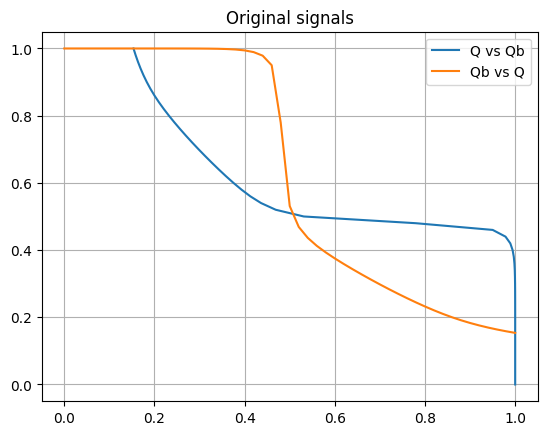

In [7]:
plt.figure()
plt.plot(
    read_result.signals[read_spec.signals[0]].x,
    read_result.signals[read_spec.signals[0]].y,
    label=read_result.signals[read_spec.signals[0]].title
)
plt.plot(
    read_result.signals[read_spec.signals[1]].x,
    read_result.signals[read_spec.signals[1]].y,
    label=read_result.signals[read_spec.signals[1]].title
)
plt.title("Original signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

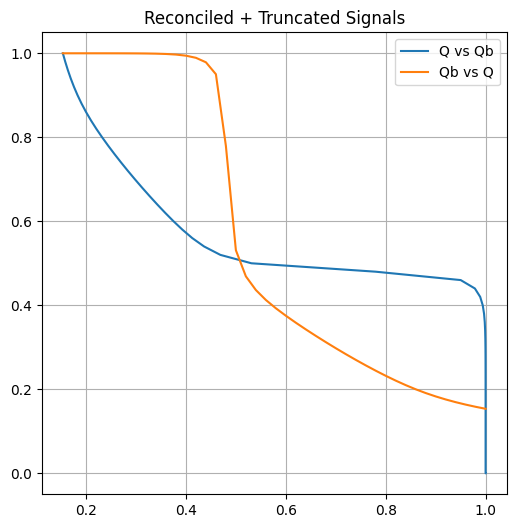

In [8]:
plt.figure(figsize=(6,6))
plt.plot(read_result.signal1.x, read_result.signal1.y, label=read_result.signal1.title)
plt.plot(read_result.signal2.x, read_result.signal2.y, label=read_result.signal2.title)
# plt.plot((0, 1), (1, 0), label='Axis')
plt.title("Reconciled + Truncated Signals")
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.show()

Square dim = 0.19785324557586997
Anchor idx = 18
(X1, Y1) = (0.26, 0.7553477587240206)
(X2, Y2) = (0.45785324557587, 0.9532010042998906)


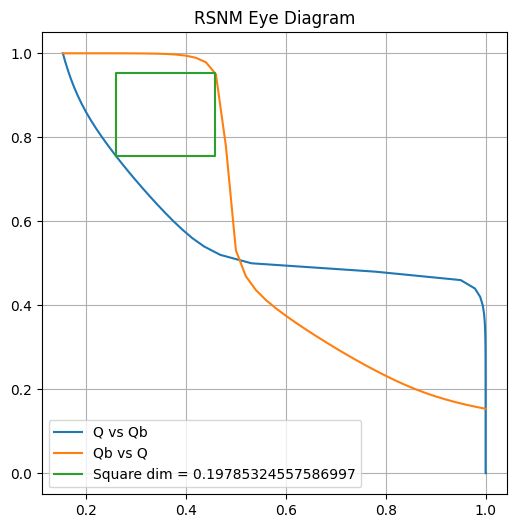

In [9]:
square_dim, anchor = read_result.calculate_square_dim()
print(f"Square dim = {square_dim}")
print(f"Anchor idx = {anchor}")
print(f"(X1, Y1) = ({read_result.signal1.x[anchor]}, {read_result.signal1.y[anchor]})")
print(f"(X2, Y2) = ({read_result.signal1.x[anchor] + square_dim}, {read_result.signal1.y[anchor] + square_dim})")
read_result.plot()

In [10]:
WRITE_VCSV_PATH = Path("WSNM.vcsv")
write_dataframe, write_titles = read_vcsv(WRITE_VCSV_PATH)
write_waveforms = construct_waveforms(write_dataframe, write_titles)

In [11]:
write_spec = WriteSRAMNoiseMarginResultSpecification(signals=write_titles)
write_result: WriteSRAMNoiseMarginResult = write_spec.interpret(write_waveforms)

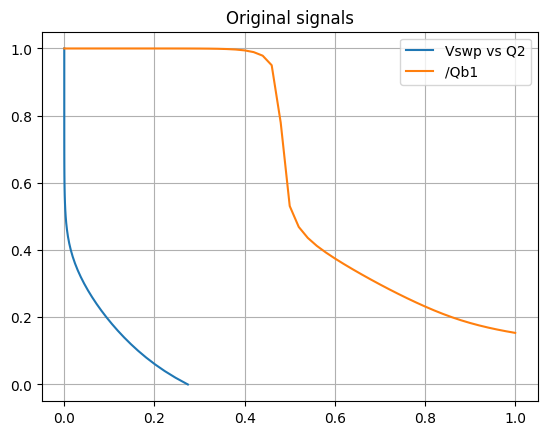

In [12]:
plt.figure()
plt.plot(
    write_result.signal1.x,
    write_result.signal1.y,
    label=write_result.signal1.title
)
plt.plot(
    write_result.signal2.x,
    write_result.signal2.y,
    label=write_result.signal2.title
)
plt.title("Original signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

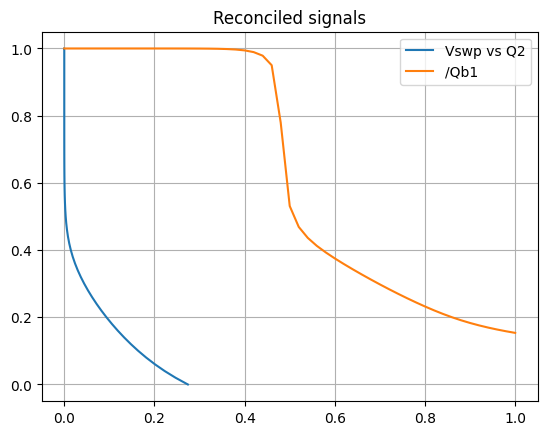

In [13]:
write_result.reconcile()
plt.figure()
plt.plot(
    write_result.signal1.x,
    write_result.signal1.y,
    label=write_result.signal1.title
)
plt.plot(
    write_result.signal2.x,
    write_result.signal2.y,
    label=write_result.signal2.title
)
plt.title("Reconciled signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

Square dim = 0.35293325279190535
Anchor idx = 64
(X1, Y1) = (0.2740953665736586, 0.0)
(X2, Y2) = (0.627028619365564, 0.35293325279190535))


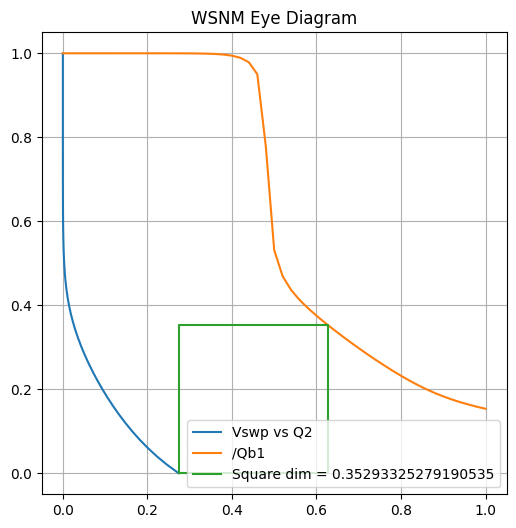

In [14]:
write_square_dim, write_anchor = write_result.calculate_square_dim()
print(f"Square dim = {write_square_dim}")
print(f"Anchor idx = {write_anchor}")
print(f"(X1, Y1) = ({write_result.signal1.x[write_anchor]}, {write_result.signal1.y[write_anchor]})")
print(f"(X2, Y2) = ({write_result.signal1.x[write_anchor] + write_square_dim}, {write_result.signal1.y[write_anchor] + write_square_dim}))")
write_result.plot()
